In [16]:
# Versuch die .csv Datei aufzubereiten um einen Graph
# mit predictor "Buy Computer" zu sehen, erfolgt noch
# als Beispiel für einen Graphen wurde jetzt der Iris Datensatz
# genommen, da hier keine Aufbereitung nötig ist (siehe unten)

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
 
data = pd.read_csv("datasets-32661-42509-Buy_Computer.csv") 
data

,id,age,income,student,credit_rating,Buy_Computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_age,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_age,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [17]:
list(data.keys())

['id', 'age', 'income', 'student', 'credit_rating', 'Buy_Computer']

In [28]:
# training data
# X = data[:, "age":]
# column "Buy_Computer" are target values
X = data.drop(['Buy_Computer', 'id'], axis=1)
y = data['Buy_Computer']
X

,age,income,student,credit_rating
0,youth,high,no,fair
1,youth,high,no,excellent
2,middle_age,high,no,fair
3,senior,medium,no,fair
4,senior,low,yes,fair
5,senior,low,yes,excellent
6,middle_age,low,yes,excellent
7,youth,medium,no,fair
8,youth,low,yes,fair
9,senior,medium,yes,fair


In [29]:
y = data['Buy_Computer']
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Buy_Computer, dtype: object

In [31]:
# Problem dieses Datensatzes ist die Aufbereitung der Daten
# Aufbereitung bedeutet hier strings in numerische Werte umzuwandeln
# Dazu müsste eine Art Legende erstellt werden in der die String Werte
# numerischen Werten zugeordnet werden
# Ansonsten ist der Decission Tree nicht lesbar
tree = DecisionTreeClassifier(max_depth=7, criterion = "entropy")
tree.fit(X, y)

ValueError: could not convert string to float: 'youth'

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
 
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
 
tree_clf = DecisionTreeClassifier(max_depth = 6, criterion = "entropy")
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [17]:
from sklearn.tree import export_graphviz
 
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
 )

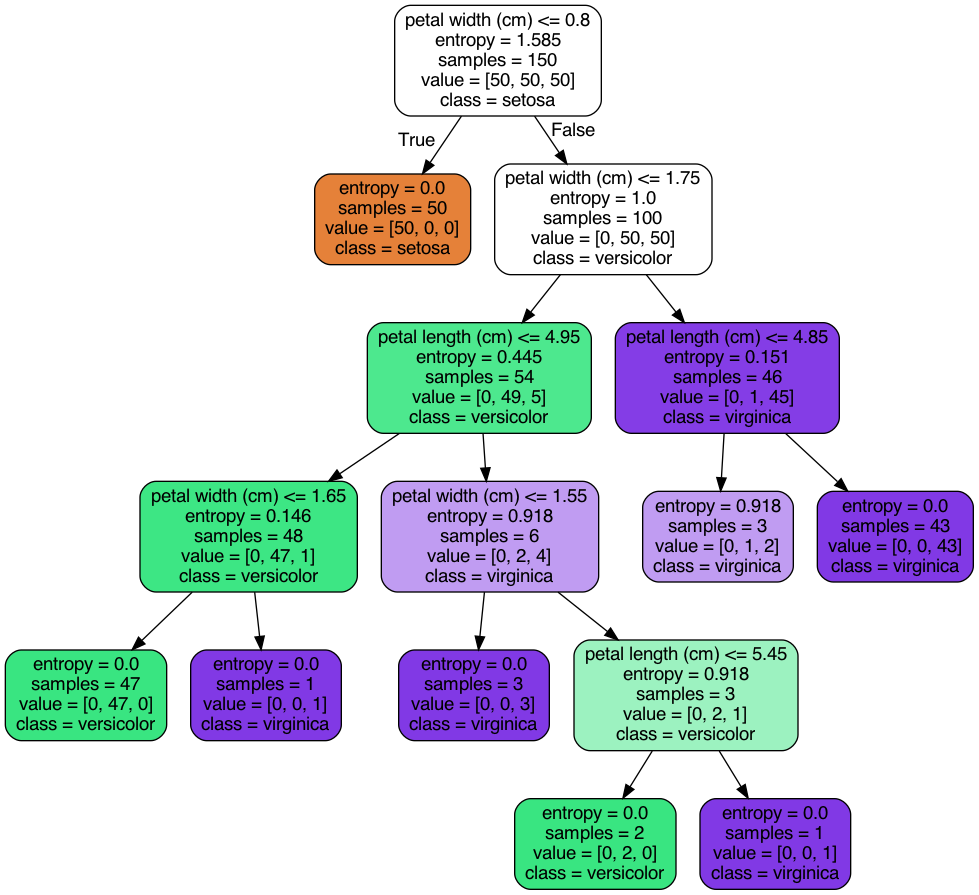

In [18]:
from IPython.display import Image

Image("iris_tree.png", width=640, height=640)